In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 저번시간은 데이터 시각화 쪽과 EDA 확인
## 데이터 전처리를 확인할 예정 
### 전처리코드는 대부분 Kaggle 확인하고 높은 점수 또는 좋은 인사이트를 주는 마스터들의 코드를 확인하고 공유
### 다 이해하는 것 보다는 코드를 작성한 사람의 접근방법, 로직 등을 여러분들이 한 번쯤은 이해하고 알아두면 좋을 것 같다!
### 수업시간에 배우지 않은 내용들이 나올 수 있다. 이 부분은 최대한 설명드릴 예정이지만 중요한 건 왜 이렇게 했을까?
### 이 코드를 작성하면서 이 사람이 얻고자 하는 것
### 이 코드의 공통적인 접근 방법!

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [5]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

### 데이터 전처리 진행시 
- 공통적으로는 모든 문자열 데이터 등이 다 수치화 되어야 한다.
### 데이터 타입에 따라 전처리 방식 다르다!
- 문자형 데이터 : 우리가 알고 있는 문자라는 뜻을 -> 인코딩하여 수치로 바꿔야 한다.
- 숫자형 데이터 : 연속(연속적인 숫자), 이산 (0,1,2)
- 연속적인 숫자를 range로 만들어서 전처리 하는 경우

### 전처리하면서 공통점은?
- 타겟값 y값 기준으로 데이터의 분포를 봐야한다!

In [6]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


### Name 전처리 방법!

In [7]:
for df in combine:
    df['Name_re'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False) #정규표현식 문자열 전처리할 때 내가 원하는 문자만 추출
    # 패턴을 새롭게 만들거나, 패턴을 찾거나, 빈도를 분석하거나 할 때 많이 사용
    # 문자열, 텍스트 분석시 필수로 많이 사용한다! 

In [8]:
#전처리한 값을 pd.crosstab으로 확인하기

pd.crosstab(train_df['Name_re'], train_df['Sex'])

Sex,female,male
Name_re,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


### 데이터의 정보가 1개씩 매핑되는 것들이 너무 많다보면 학습할 때 정답을 예측하기에 오히려 더 문제가 된다.
- 다양한 정보들이 많아지게 되면서 그룹핑을 통해 데이터 전처리 등을 많이 한다.

In [9]:
for df in combine:
    df['Name_re'] = df['Name_re'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare') #확실하게 정보를 분류할 수 있는 값들은 제외하고 나머지들 작은 값들은 다 하나로 묶는다.
    
    
    df['Name_re'] = df['Name_re'].replace('Mlle','Miss') # 확실한 친구들은 남여 값으로 대체 한다MISS, MRS
    df['Name_re'] = df['Name_re'].replace('Ms','Miss')
    df['Name_re'] = df['Name_re'].replace('Mme','Mrs')
    
train_df[['Name_re','Survived']].groupby(['Name_re'],as_index=False).mean() #만든 전처리 코드를 생존 같이 묶어서 확인한다

,Name_re,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### 내가 사용할 값들을 -> 인코딩으로 바꾸기! 수치로 바꿔줘야 한다!

In [10]:
name_re = {'Mr':1, 'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for df in combine:
    df['Name_re'] = df['Name_re'].map(name_re) # 위에 적은 딕셔너리의 키에 맞는 값들을 값으로 바꾼다.
    df['Name_re'] = df['Name_re'].fillna(0) #na값 없는 값은 0으로 대체한다
    
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


### 남성 여성 매핑 

In [11]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [12]:
for df in combine:
    df['Sex'] = df['Sex'].map({'female':1,'male':0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [13]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Name_re       0
dtype: int64

### age 값이 Nan 값이 만다

- Age 컬럼의 전체 분포나, 빈도나 이런 통계적인 수치를 가지고 결측값을 대체한다!
- Age -> 다른 컬럼들과 관계를 보고 -> 그컬럼들의 특성을 가지고 Age 얘를 대체한다
- pclass 성별이랑 두 개를 확인해서 -> Age 분포가 되어있는지 보고 해당 분포를 가지고 Age의 값을 대체하게 된다.

- Age를 대체하기 위해서 pclass, sex 고른 근기가 필요하다.
- 컬럼들간의 관계 ( 수치적인 것들 ), 도메인 지식은 필수적으로 생각해야 한다.

/Users/kook/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


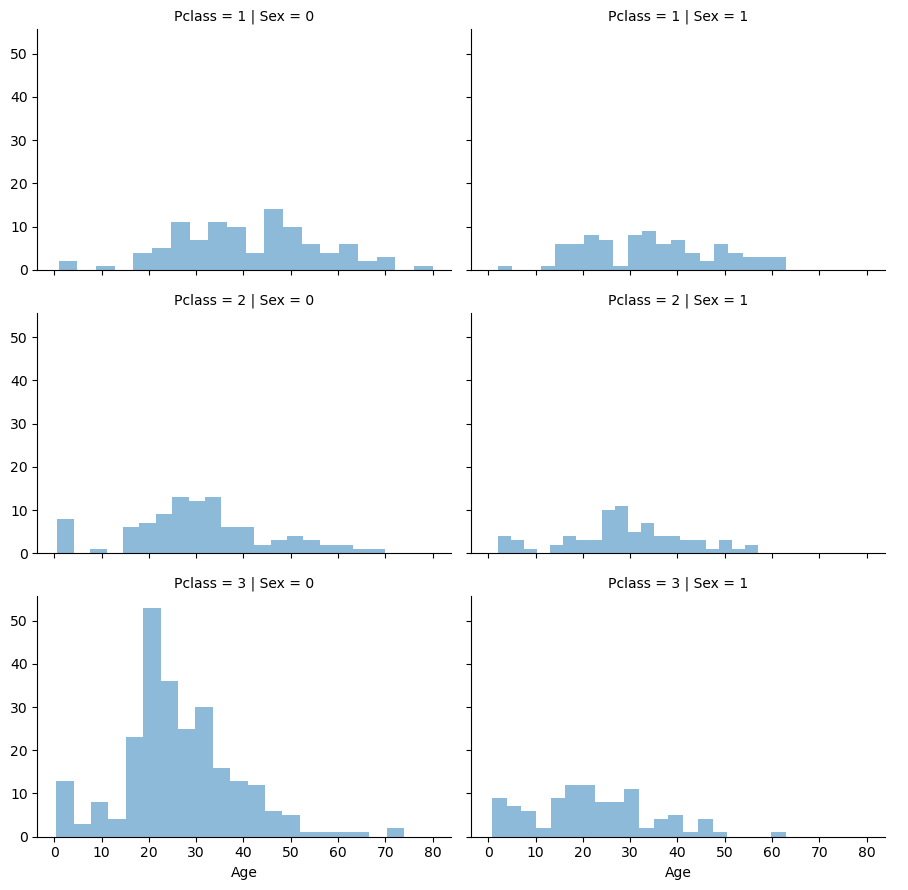

In [14]:
grid = sns.FacetGrid(train_df , row='Pclass', col='Sex', aspect= 1.5)
grid.map(plt.hist , 'Age', alpha=.5, bins=20)
grid.add_legend()

- 나이라는 것도 1살~ 80살,100살 
- 이 나이가 또 1:1 대응이 많아지면 복잡해진다.
- 학습을 위해서 범주화하여 나이 자체도 5세그룹 10세 그룹 이런식으로 그룹바이를 진행한다.

In [15]:
# age에 대한 guess 하기 위한 배열 하나 만들기
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [16]:
#결측값을 채우는 코드 
for df in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = df[(df['Sex']==i) & (df['Pclass']== j+1)]['Age'].dropna()
            
            age_guess = guess_df.median()
            
            guess_ages[i,j]= int(age_guess/0.5 + 0.5) * 0.5 #나이에 대한 범주화 기준을 미디안으로 잡고 수식을 만들어서 넣었다.
            
            
    
    for i in range(0,2):
        for j in range(0,3):
            df.loc[(df.Age.isnull())& (df.Sex == i)& (df.Pclass == j+1), 'Age'] = guess_ages[i,j]
            
    
    df['Age'] = df['Age'].astype(int) 

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


### 나이에 대해서 범주화한 값을 살펴보자!

In [17]:
train_df['Agerange'] = pd.cut(train_df['Age'],5)

In [18]:
train_df[['Agerange','Survived']].groupby(['Agerange'], as_index=False).mean().sort_values(by='Agerange', ascending=True)

,Agerange,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [19]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Name_re     0
Agerange    0
dtype: int64

- age 미싱값이 다사라지고 전처리한 코드!

### age -> 인코딩 진행 

In [20]:
for df in combine:
    df.loc[df['Age'] <= 16, 'Age']=0
    df.loc[(df['Age'] > 16) & (df['Age'] <=32), 'Age']=1
    df.loc[(df['Age'] > 32) & (df['Age'] <=48), 'Age']=2
    df.loc[(df['Age'] > 48) & (df['Age'] <=64), 'Age']=3
    df.loc[df['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re,Agerange
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [21]:
train_df.Age.value_counts()

Age
1     495
2     216
0     100
3      69
65      3
70      3
71      2
66      1
80      1
74      1
Name: count, dtype: int64

In [22]:
train_df = train_df.drop(['Agerange'],axis=1)

In [23]:
combine = [train_df, test_df]

In [24]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5
887,1,1,1,1,0,0,30.0000,S,2
888,0,3,1,1,1,2,23.4500,S,2
889,1,1,0,1,0,0,30.0000,C,1


In [25]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5
887,1,1,1,1,0,0,30.0000,S,2
888,0,3,1,1,1,2,23.4500,S,2
889,1,1,0,1,0,0,30.0000,C,1


## sibsp, parch


- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	


- sibsp, parch 도메인의로 두 개의 변수를 합쳐서 -> 하나의 새로운 파생변수 FamilySize로 만듦!

In [26]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1 #가족과 관련된 컬럼을 -> 패밀리수치형 바꿈

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


- 기존  FamilySize 변수를 다 사용하는 것이 아닌 -> 0,1의 혼자인지 아닌지를 새로운 파생변수로 !

In [27]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean() #0,1 로 혼자 탑승과 가족들과 함께 탑승의 생존율

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [28]:
train_df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [29]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head() #IsAlone 만듦

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_re,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [30]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10) #age, Class를 가지고 파생변수 만들기!

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [31]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [32]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port) #선박관련된 컬럼의 na값을 가장 빈도가 높은 것으로 fillna 대체
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int) #문자열 ->수치로 변경!

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_re,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [34]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True) 
## na값을 제외한 중위값을 대체 
#inplace=True 는 원본데이터를 수정한다는 뜻
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Name_re,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [35]:
test_df['Fare'].isna().sum()

0

In [36]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4) 
#qcut 가지고 FareBand 만듦
#cut은 동일한 길이로 나누는 것. qcut은 나눴을 때 각 구간 별로 동일한 샘플 수가 되도록 만드는 것
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [37]:
for dataset in combine: #동일한 방식으로 인코딩 진행!
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_re,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


## 0,1 생존에 대한 예측을 하기 위해 대부분 인코딩 진행해서 값을 변경

In [38]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [39]:
# Logistic Regression
# 로지스틱회귀로 0,1 예측 학습

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

### 전처리 비교

In [40]:
#다시 데이터를 불러오고 비교하기!
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

or_tf=train_df[['Pclass','Age','SibSp','Parch','Sex','Embarked','Survived']]

or_tf.dropna(inplace=True) # na값 대체하지 않음
Y_train=or_tf[['Survived']]

/var/folders/4q/g67ctnjs2n1b934mldw6ktyr0000gn/T/ipykernel_1548/499174084.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_tf.dropna(inplace=True) # na값 대체하지 않음


In [41]:
or_tf

,Pclass,Age,SibSp,Parch,Sex,Embarked,Survived
0,3,22.0,1,0,male,S,0
1,1,38.0,1,0,female,C,1
2,3,26.0,0,0,female,S,1
3,1,35.0,1,0,female,S,1
4,3,35.0,0,0,male,S,0
...,...,...,...,...,...,...,...
885,3,39.0,0,5,female,Q,0
886,2,27.0,0,0,male,S,0
887,1,19.0,0,0,female,S,1
889,1,26.0,0,0,male,C,1


In [47]:
or_tf_gd=pd.get_dummies(or_tf[['Sex','Embarked']])*1 #0,1 인코딩 -> 단순하게 원핫인코딩으로 수치형 변경
#pd.get_dummies(or_tf[['Sex', 'Embarked']]): 'Sex'와 'Embarked' 열에 대해 더미 변수를 생성합니다. 
#이는 원핫 인코딩(one-hot encoding)을 수행하는 역할을 합니다. 각 범주에 대해 새로운 이진 변수가 생성됩니다.
# 1: 모든 값에 1을 곱하여 0 또는 1로 표시되는 이진 값으로 변환합니다. 이 과정을 통해 더미 변수를 정수형으로 변환합니다.

or_tf_sp=or_tf[['Pclass','Age','SibSp','Parch']]

In [48]:
or_tf_gd

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
885,1,0,0,1,0
886,0,1,0,0,1
887,1,0,0,0,1
889,0,1,1,0,0


In [44]:
X_train =pd.concat([or_tf_sp,or_tf_gd], axis=1)

In [93]:
# Logistic Regression
# 인코딩만 진행하고 결측값 제외한 비교군 학습 

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
#Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


80.06

## 필수과제1 
- 본인이 추가로 의미가 있다고 생각되는 파생변수 전처리 또는 기존 변수 전처리 ( 수업코드 외에 다른 방식 추가 필수 ) 진행하여
- 아래 나와있는 인코딩만 학습한 비교군과 실제 모델링 성능 비교해 보기! # 인코딩만 진행하고 결측값 제외한 비교군 학습 
- 더 좋은 성능도 언제든지 올릴 수 있으니 도전해 보기!

# Missing Value

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

import missingno as msno # missing value를 쉽게 확인할 수 있는 패키지

In [100]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [101]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 결측값을 채우는 함수

In [102]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [104]:
train_missing = missing_values_table(train)
train_missing

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [107]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Missing value를 시각적으로 빠르게 확인하기!

<Axes: >

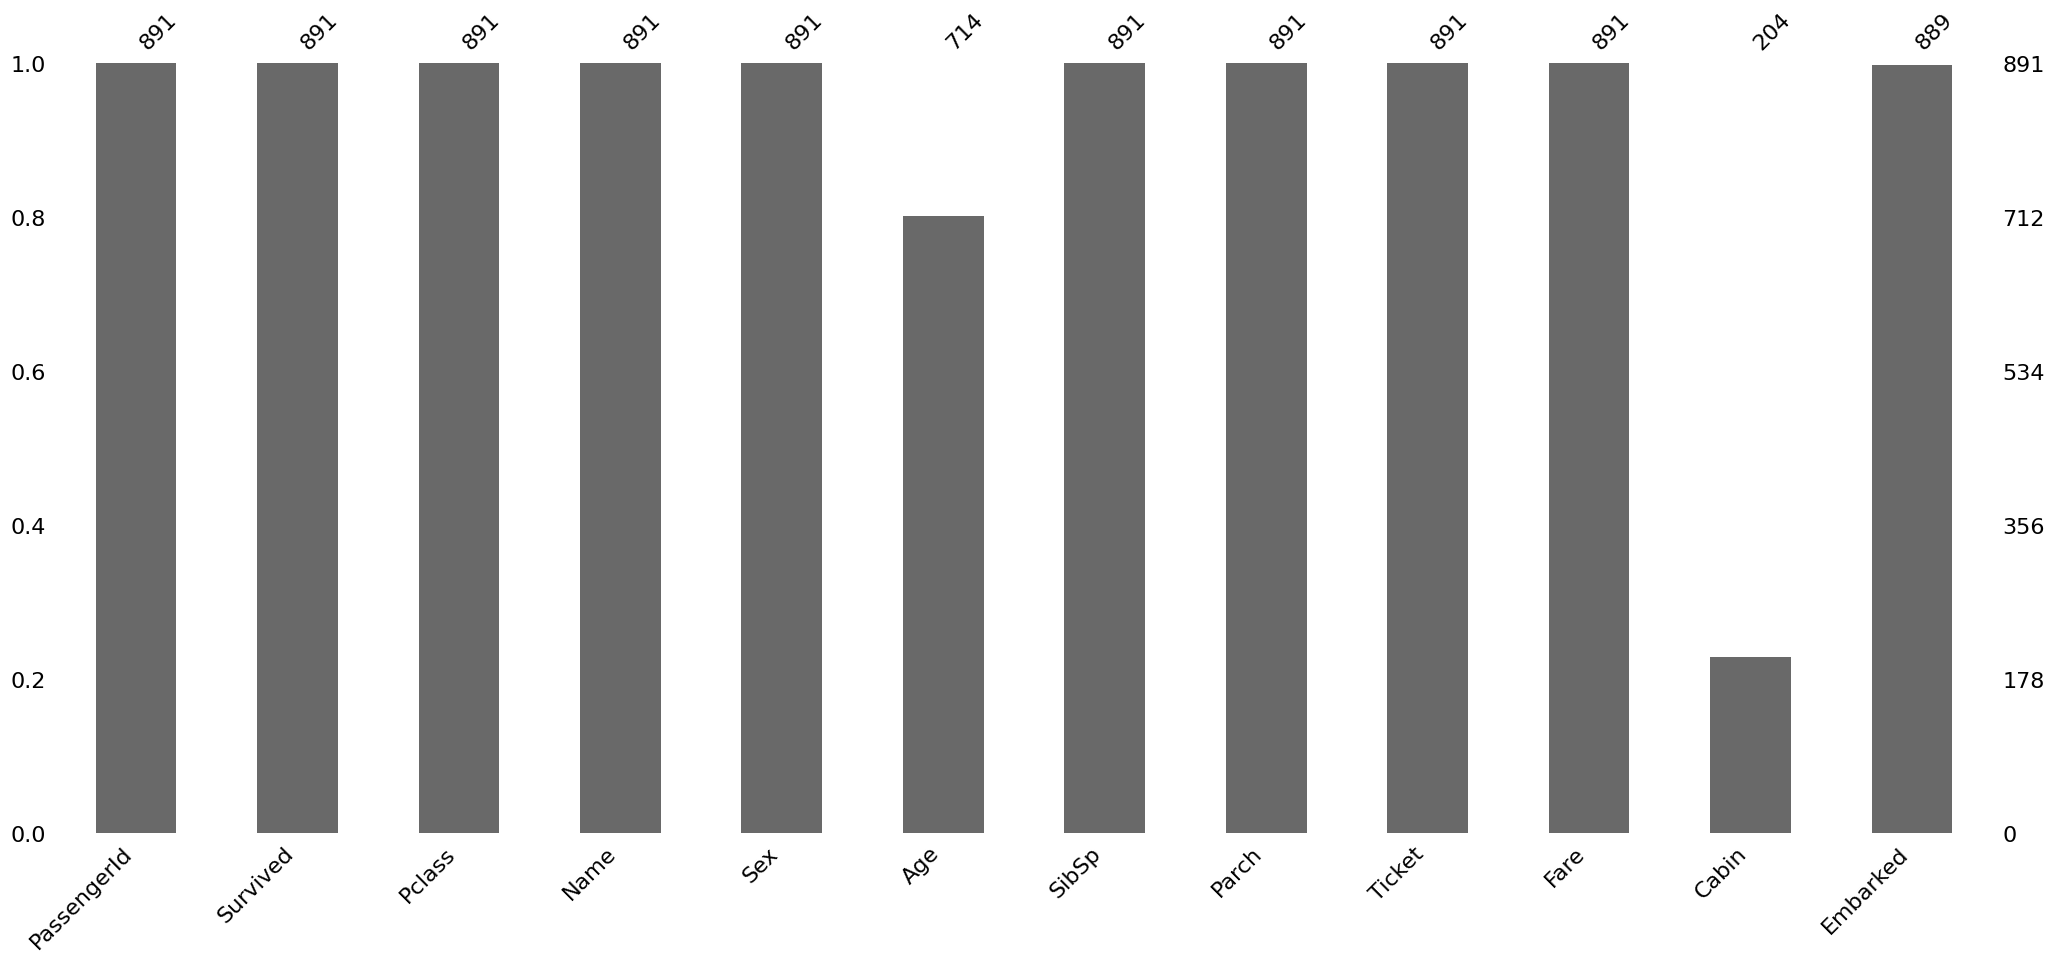

In [108]:
msno.bar(train)

<Axes: >

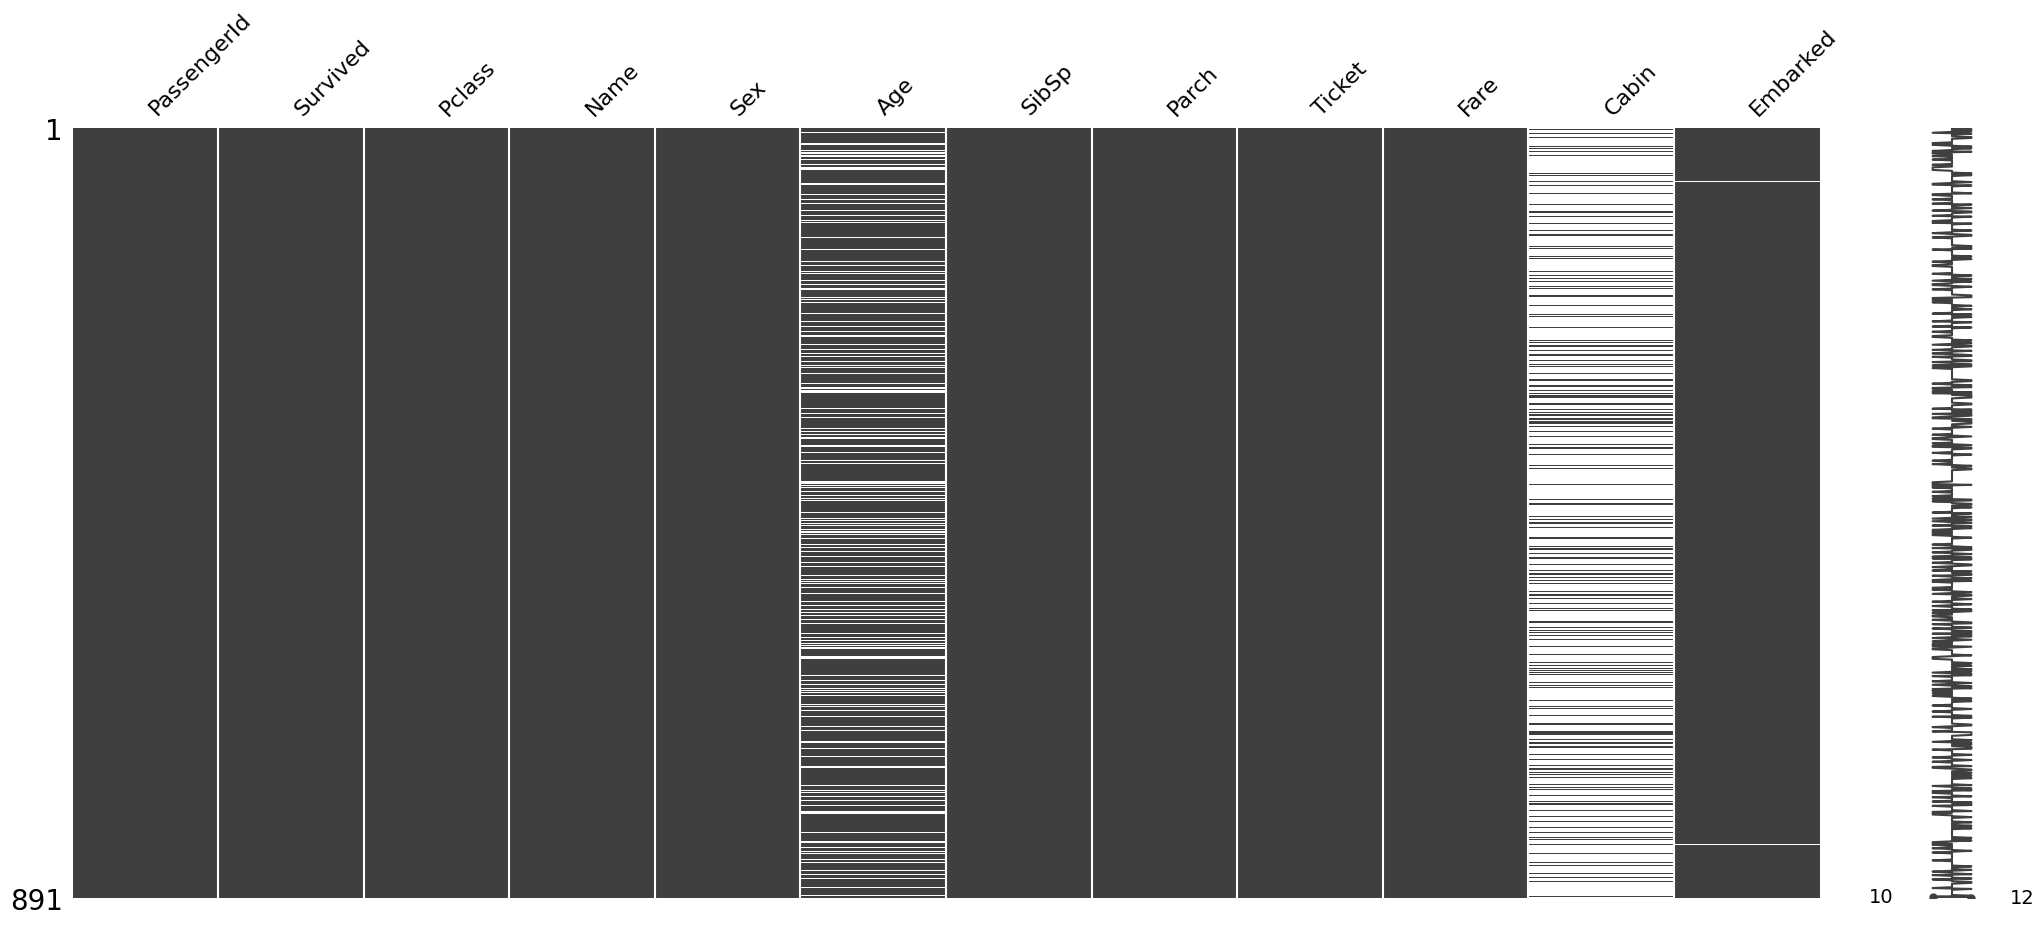

In [109]:
msno.matrix(train)

<Axes: >

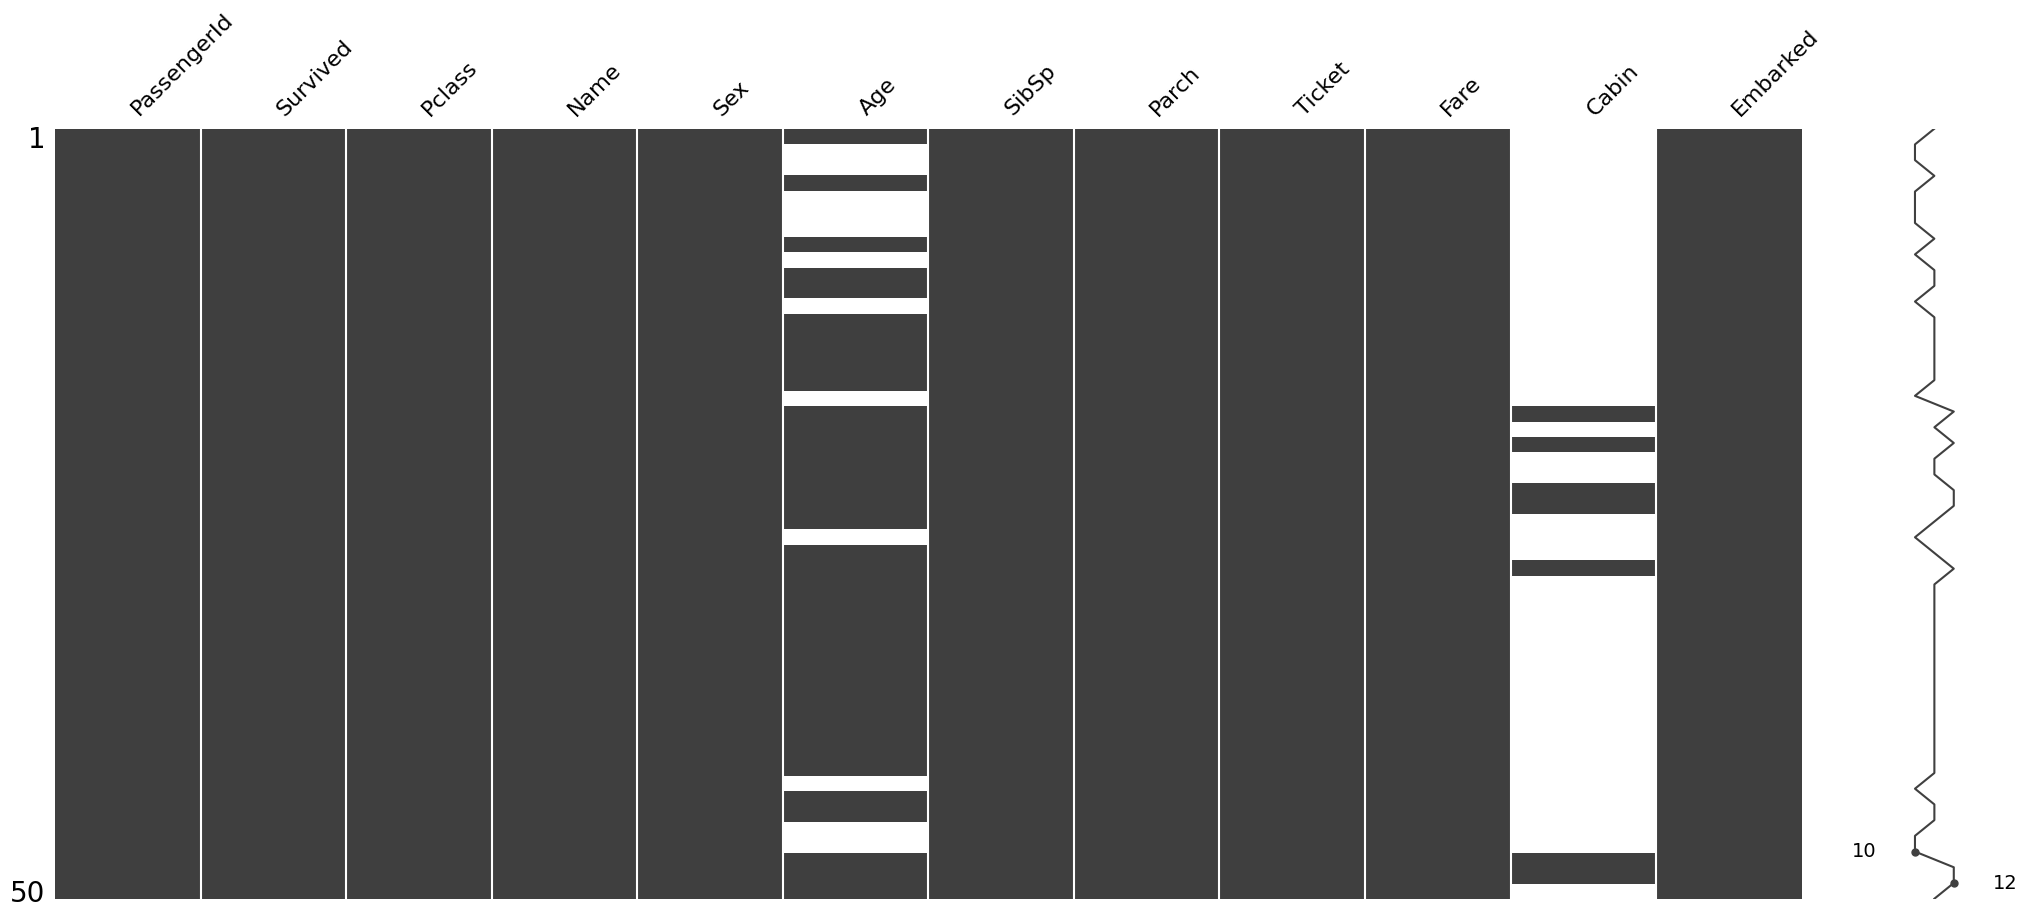

In [110]:
# 범위도 정해서 볼 수 있다
msno.matrix(train.sample(50))

<Axes: >

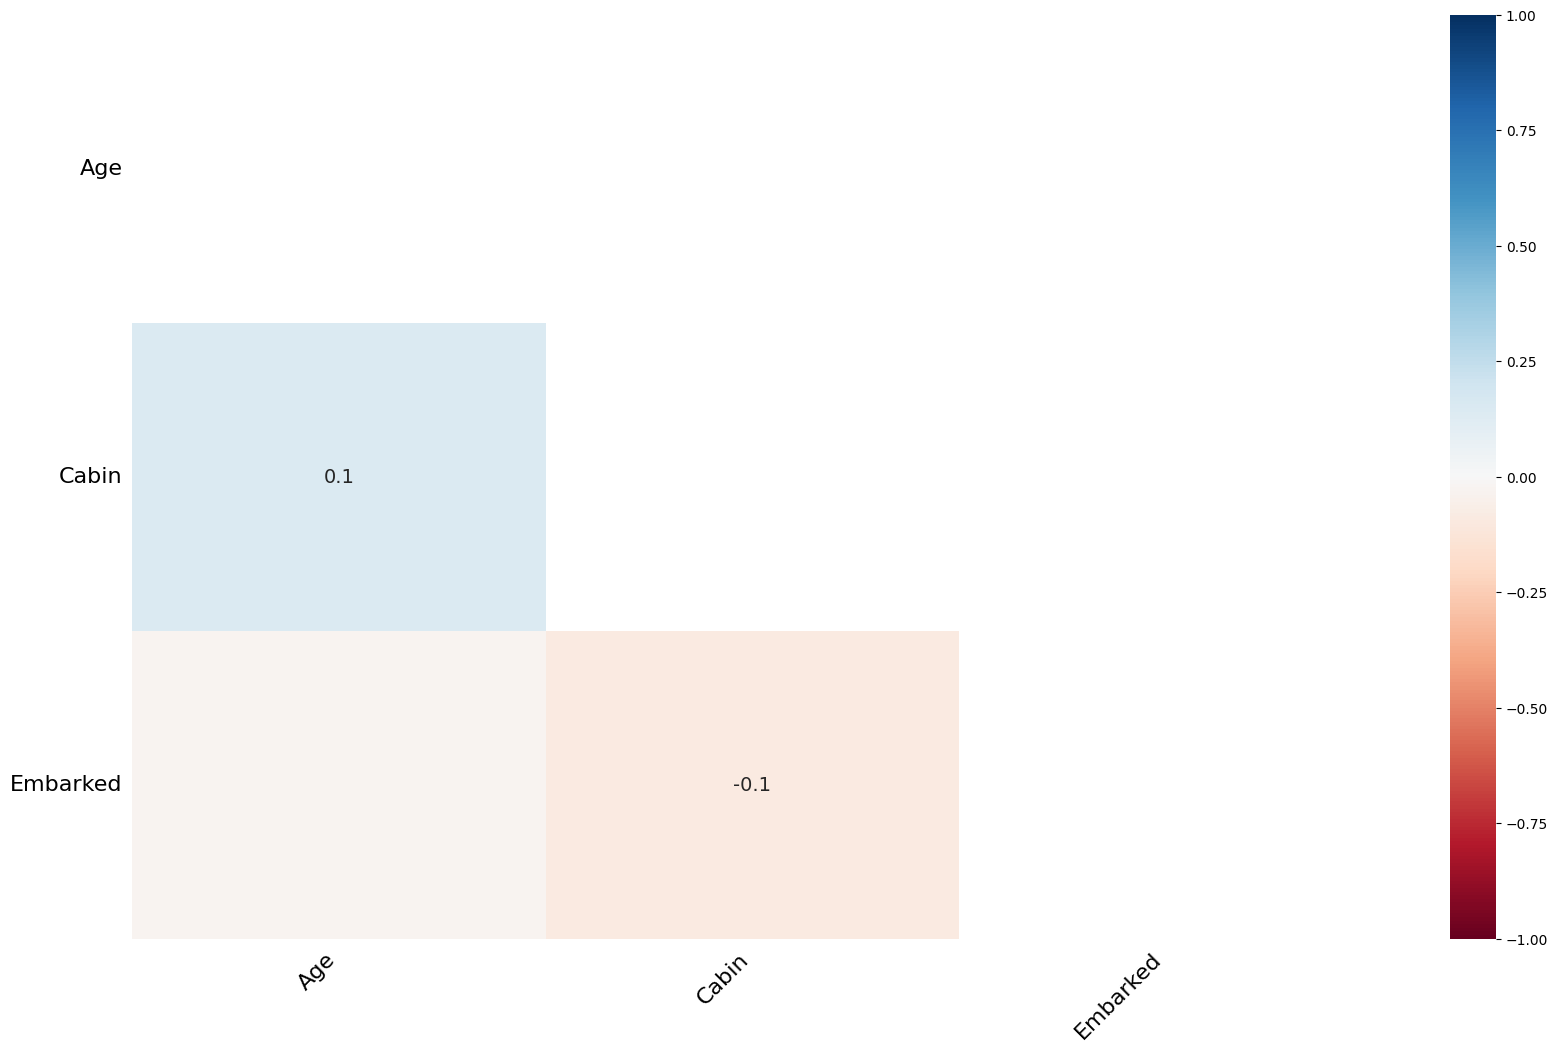

In [111]:
#msno heatmap 
msno.heatmap(train)
## missing value의 상관성을 확인할 수 있다.

## 데이터 삭제하는 법! ( Missing Value 삭제!)

In [114]:
train_1 = train.copy()
train_1['Age'].mean() # Age 값을 가지고 다음시간에도 같이 대체해보면서 변화 확인하기!

29.69911764705882

In [118]:
# 데이터 삭제하는 방법
train_1.dropna(subset=['Age'], how='any',inplace=True) 
# subset 안에는 삭제할 컬럼, how any는 해당 결측값이 하나라도 있으면 행 삭제. how all은 모든 값이 결측값인 행을 제거
#all 방법은 옆의 컬럼도 다 na값이 있어야 한다.
train_1['Age'].isnull().sum()

0

In [119]:
train_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [120]:
train_2 = train.copy()

In [121]:
# 데이터 삭제하는 방법
train_2.dropna(subset=['Age'], how='all',inplace=True) # subset 안에는 삭제할 컬럼, how any, all any는 해당 결측값이 있으면 age에 이 있으면 삭제
#all 방법은 옆의 컬럼도 다 na값이 있어야 한다.
train_2['Age'].isnull().sum()

0

In [122]:
train_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
